## <font color=green>Bibliotecas Utilizadas

https://pandas.pydata.org/

https://www.numpy.org/

https://seaborn.pydata.org/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## <font color=green>Dataset</font>
***

### Dados da Previsão/Série Histórica da Temperatura Máxima de Manaus - Junho e Julho 2020

Dados da previsão da temperatura máxima fornecidos pelo Ministério da Defesa e da série histórica do INMET da estação meterológica de Manaus referente ao meses de junho e julho 2020.

Obs: Foi feita a média diária da tempetura máxima do Dataset do INMET para melhor análise dos dados.

### Fonte dos Dados

INMET - https://portal.inmet.gov.br/dadoshistoricos

Ministério da Defesa - https://dados.gov.br/dataset/previsao-climatica-do-censipam


 


### Lendo o dataset 

In [ ]:
dados = pd.read_csv('tempprevManaus-junjul20.csv')

Tamanho do Dataset

In [ ]:
dados.shape

(58, 3)

Cinco primeiras linhas

In [ ]:
dados.head()

,Data,TemMaxPrevisao,TemMaxEstacao
0,01/06/2020,30,26
1,02/06/2020,30,27
2,03/06/2020,31,28
3,04/06/2020,31,28
4,05/06/2020,32,29


## <font color=green>Métricas</font>
***

### Média - Temperatura Média e Previsão 

$$\ m = \frac 1n\sum_{i=1}^{n}X^t$$

In [ ]:
dados.mean()

TemMaxPrevisao    31.603448
TemMaxEstacao     28.672414
dtype: float64

# Variância

### $$S^2 = \frac 1{n}\sum_{t=1}^{n}(X^t-m)^2$$

In [ ]:
varianciaTemMaxPrevisao = dados['TemMaxPrevisao'].var()
varianciaTemMaxPrevisao

1.436479128856623

In [ ]:
varianciaTemMaxEstacao = dados['TemMaxEstacao'].var()
varianciaTemMaxEstacao

1.2767695099818503

### Desvio padrão

# $$\ s = \sqrt{\frac 1n\sum_{t=1}^{n}(X^t-\ m)^2}$$ 

In [ ]:
np.sqrt(varianciaTemMaxPrevisao)

1.1985320725189723

In [ ]:
np.sqrt(varianciaTemMaxEstacao)

1.1299422595787143

### Covariância

# $$\ s_{ij} = \frac 1N\sum_{t=1}^{N}(X_i^t- m_i)(X_i^j- m_j)$$

In [ ]:
sij = dados[[ 'TemMaxEstacao', 'TemMaxPrevisao']].cov()
sij

,TemMaxEstacao,TemMaxPrevisao
TemMaxEstacao,1.276770,0.955535
TemMaxPrevisao,0.955535,1.436479



### Coeficiente de correlação
# $$r_{ij} = \frac{s_{ij}}{s_{i}s_{j}}$$

Onde



$s_{i}$ e $s_{j}$ = desvios padrão amostrais de i e j, respectivamente

### Obtendo $s_{ij}$

In [ ]:
sij= sij.TemMaxEstacao.loc['TemMaxPrevisao']
sij

0.955535390199637

### Obtendo $s_i$ e $s_j$

In [ ]:
si = dados.TemMaxEstacao.std()
si

1.1299422595787143

In [ ]:
sj = dados.TemMaxPrevisao.std()
sj

1.1985320725189723

### Obtendo o coeficiente de correlação $r_{iy}$

In [ ]:
rij = sij / ( si * sj)
rij

,TemMaxEstacao,TemMaxPrevisao
TemMaxEstacao,0.942772,0.705571
TemMaxPrevisao,0.705571,1.060702


### Matriz de correlação (Biblioteca Pandas)

In [ ]:
dados[['TemMaxPrevisao', 'TemMaxEstacao']].corr()

,TemMaxPrevisao,TemMaxEstacao
TemMaxPrevisao,1.000000,0.705571
TemMaxEstacao,0.705571,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


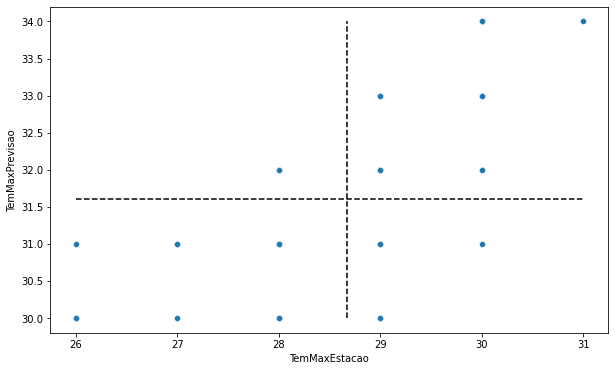

In [ ]:
x = dados.TemMaxEstacao
y = dados.TemMaxPrevisao

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')